# Imports

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating a dataframe

In [ ]:
df = pd.DataFrame({
    "Province": ["Province 1", "Province 2", "Province 3", "Province 4"],
    "Healthcare Services": [4.3, 2.5, 3.5, 4.5],
    "E-Gov Services": [2.4, 4.4, 1.8, 2.8],
    "Agricultural Support": [2.0, 2.0, 3.0, 5.0],
    "Education Quality": [3.8, 4.1, 2.9, 3.2],
    "Public Safety": [4.0, 3.5, 3.7, 4.2],
    "Infrastructure": [2.5, 3.0, 4.5, 3.8]
})

#### **Line Plot:**
* Shows trends or changes in values across provinces or over time.
* Useful for monitoring growth or decline.


In [ ]:
fig = px.line(
    df,
    x="Province",
    y=df.columns.drop("Province"),
    markers=True,
    title="Line Plot – Trends Across Provinces"
)
# Update all traces to use cross markers
fig.update_traces(marker=dict(symbol='x', size=10))
fig.show()


#### **Bar Plot (Vertical bars):**
* Compares values across different provinces or categories.
* Ideal for ranking and comparisons

In [ ]:
fig = px.bar(
    df,
    x="Province",
    y=df.columns.drop("Province"),
    title="Bar Chart – Comparison of Services Across Provinces"
)

fig.update_layout(
    barmode="group",
    xaxis_title="Province",
    yaxis_title="Service Score",
    legend_title="Service Type"
)

fig.show()


#### **Bar Plot (Horizontal bars):** Compares values across different provinces or categories.
* Ideal for ranking and comparisons.
* Useful when category names are long or when many categories exist.

In [ ]:
fig = px.bar(
    df,
    y="Province",
    x=df.columns.drop("Province"),
    orientation="h",
    title="Horizontal Grouped Bar Chart – Comparison Across Provinces"
)

fig.update_layout(
    barmode="group",
    height=700,
    xaxis_title="Service Score",
    yaxis_title="Province",
    legend_title="Service Type"
)

fig.show()


# Exercise 1
### Scenario

While the grouped bar chart is useful, it becomes difficult to analyze a single province's performance when all the bars are crowded together.  
Your manager wants a dashboard where **each province has its own dedicated sub-chart (column)** to make it easier to compare services within that specific region.

---

### Your Task

Write a **Python script using Plotly Express** to create a **Faceted Bar Chart**.

### Objective
- Create separate sub-charts for each province
- Allow easy comparison of services **within** each province
- Improve readability and analytical clarity

---

In [ ]:
# Reshape data for faceted plotting
df_melted = df.melt(id_vars='Province', var_name='Service', value_name='Score')

# Create faceted bar chart with each province in its own column
fig = px.bar(
    df_melted,
    x='Service',
    y='Score',
    facet_col='Province',
    color='Service',
    title='Service Performance by Province (Faceted View)',
    labels={'Score': 'Performance Score', 'Service': 'Service Type'},
    height=400
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

fig.show()

# KDE
### Understanding KDE Plots

Interpreting a **Kernel Density Estimate (KDE)** plot involves analyzing three key characteristics:

* **Shape:** Look at the symmetry of the curve. A tail stretching to one side indicates **skewness**, showing whether outliers are pulling the data toward higher or lower values.
* **Peaks:** The highest point represents the **Mode**, or the most common score range in the dataset.
* **Spread:** The width of the curve represents the **variance**. A wide, flat curve indicates that scores are spread out (low Kurtosis), while a tall, narrow peak shows data is highly concentrated.

> **Key Concept:** Unlike a bar chart where you look at absolute heights, in a KDE plot you are looking at where the **"mass"** of the data is concentrated.

![Alt Text](skewness.jpg)

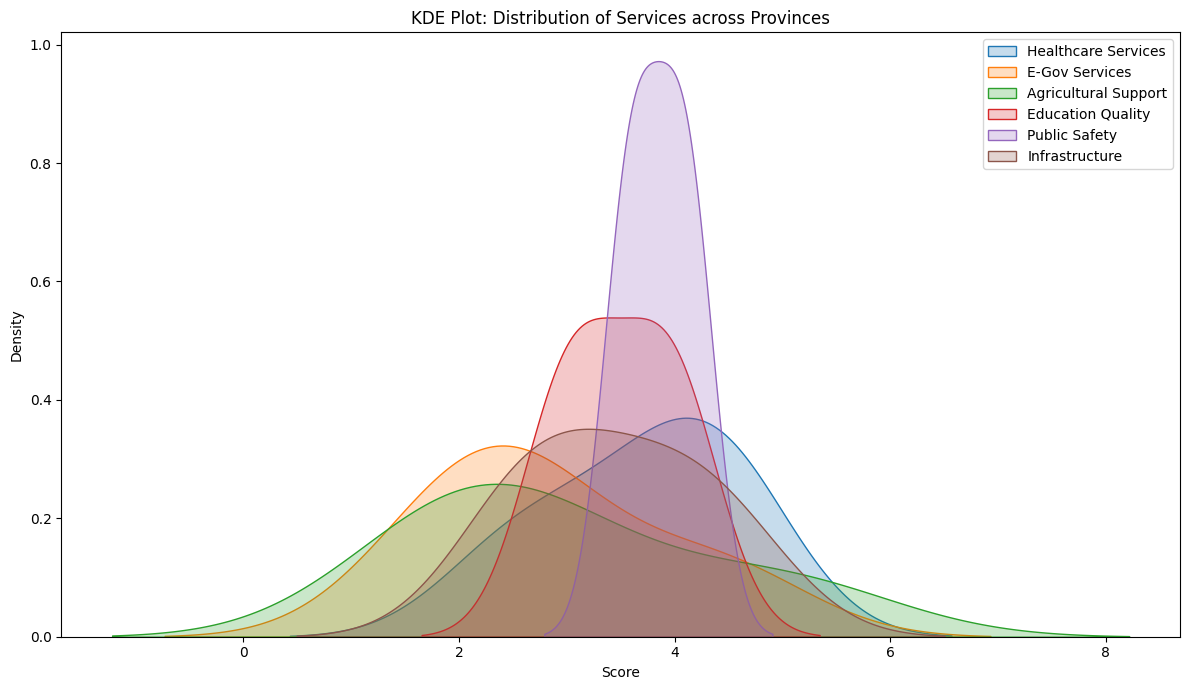

In [ ]:
# Plotting KDE
plt.figure(figsize=(12, 7))
for column in df.columns[1:]:
    sns.kdeplot(df[column], fill=True, label=column)

plt.title('KDE Plot: Distribution of Services across Provinces')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig('kde_plot_services.png')

| **Kurtosis** | **Skewness** |
| :--- | :--- |
| **Kurtosis tells you:**<br>• How extreme values (outliers) behave<br>• Whether data has heavy tails or light tails<br>• How peaked or flat the distribution is | **Skewness answers:**<br>• Is the data symmetrical?<br>• Are values stretched more to the left or the right?<br>• Where are extreme values (outliers) located? |
| **Types of Kurtosis** | **Types of Skewness** |
| **1️⃣ Mesokurtic (Normal Distribution)**<br>• Kurtosis $\approx 3$ (or $0$ excess)<br>• Moderate tails and peak<br>• Example: Bell-shaped curve | **1️⃣ Symmetrical Distribution**<br>• Skewness $\approx 0$<br>• Left and right sides mirror each other<br>• Example: Normal distribution |
| **2️⃣ Leptokurtic (High Kurtosis)**<br>• Kurtosis $> 3$<br>• Heavy tails, sharp peak<br>• More extreme outliers<br>• Example: Financial returns | **2️⃣ Positive Skew (Right-Skewed)**<br>• Skewness $> 0$<br>• Long tail to the right<br>• Mean $>$ Median<br>• Example: Income, house prices |
| **3️⃣ Platykurtic (Low Kurtosis)**<br>• Kurtosis $< 3$<br>• Light tails, flatter peak<br>• Fewer extreme values<br>• Example: Uniform distribution | **3️⃣ Negative Skew (Left-Skewed)**<br>• Skewness $< 0$<br>• Long tail to the left<br>• Mean $<$ Median<br>• Example: Exam scores (easy test) |
| **Summary:**<br>• $0$ → Normal distribution<br>• $> 0$ → Heavy-tailed<br>• $< 0$ → Light-tailed | **Summary:**<br>• $\approx 0$ → Symmetric<br>• $> 0$ → Right-skewed<br>• $< 0$ → Left-skewed |

In [ ]:
# Calculate stats
stats = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Skewness': df.skew(numeric_only=True),
    'Kurtosis': df.kurt(numeric_only=True)
})
print(stats)

                      Mean  Skewness  Kurtosis
Healthcare Services   3.70 -0.894074 -0.747659
E-Gov Services        2.85  1.199789  1.819254
Agricultural Support  3.00  1.414214  1.500000
Education Quality     3.50  0.000000 -3.300000
Public Safety         3.85  0.000000 -2.432818
Infrastructure        3.45  0.245447 -1.972665


| Service | Skewness | Kurtosis | Interpretation |
| :--- | :---: | :---: | :--- |
| **Agricultural Support** | $1.41$ | $1.50$ | **Highly Right-Skewed:** Most provinces have lower support, but one high performer (Score 5.0) creates a long tail to the right. |
| **E-Gov Services** | $1.19$ | $1.81$ | **Right-Skewed & Peaked:** Similar to agriculture, the distribution is weighted toward lower scores with a few high outliers. |
| **Healthcare Services** | $-0.89$ | $-0.74$ | **Left-Skewed:** Most provinces are scoring high, with one or two lower scores pulling the tail to the left. |
| **Education Quality** | $0.00$ | $-3.30$ | **Symmetric & Flat:** The data is perfectly balanced around the mean, but the negative kurtosis indicates the distribution is very spread out (almost uniform). |
| **Public Safety** | $0.00$ | $-2.43$ | **Symmetric:** No lean to either side, indicating a very stable and balanced service across all regions. |
| **Infrastructure** | $0.24$ | $-1.97$ | **Near Normal:** Shows a slight right lean but is generally the most "standard" bell-curve-like distribution in this set. |

# Box Plots
### Why use Plotly for Box Plots in ML?

* **Interactivity:** You can hover over the outliers, quartiles, or the median line to see the exact statistical values instantly.
* **Detailed Points:** By setting `boxpoints="all"`, you can visualize the underlying distribution of the provinces directly on top of the statistical summary, providing a better view of data density.
* **Filtering:** The interactive legend allows you to click and toggle specific services on or off, making it easier to isolate and compare only the features you are currently analyzing.

In [ ]:
# Reshape the data for plotting (Long Format)
df_melted = df.melt(id_vars="Province", var_name="Service", value_name="Score")

# Create the interactive Box Plot
fig = px.box(
    df_melted,
    x="Service",
    y="Score",
    color="Service",
    points="all",      # Displays all individual data points next to the box
    hover_data=["Province"],
    title="Service Score Distribution by Province"
)
fig.show()

# Exercise 2: Identifying Regional Inconsistency

### Goal
Learn how to interpret **statistical spread** and identify **outliers** using **Box Plots**.

---

### Scenario

The government wants to identify which public services are being delivered **consistently across all provinces** and which ones show a **"lottery" effect**—where some provinces excel while others fall behind.

A **high average value** in a bar chart can sometimes be misleading, as it may hide the fact that **one or more provinces are performing very poorly**.

Box plots help reveal:
- Variability across provinces
- Outliers
- Uneven service delivery

---


# Pie chart
**When to use pie chart?**
* When you have 2 to 5 categories. Beyond 5 slices, the chart becomes a "rainbow mess" and is hard to read.
* When you want to show the current state of a distribution, rather than a trend over time.

In [ ]:
fig = px.pie(
    df,
    names="Province",
    values="Healthcare Services",
    title="Pie Chart – Proportional Contribution"
)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="Healthcare Services",
    y="E-Gov Services",
    z="Agricultural Support",
    color="Province",
    title="3D Relationship Analysis of Public Services",
    labels={
        "Healthcare Services": "Healthcare Services Score",
        "E-Gov Services": "E-Government Services Score",
        "Agricultural Support": "Agricultural Support Score"
    }
)

fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=0, r=0, b=0, t=60),
    scene=dict(
        xaxis=dict(title="Healthcare Services"),
        yaxis=dict(title="E-Gov Services"),
        zaxis=dict(title="Agricultural Support")
    )
)

fig.update_traces(
    marker=dict(
        size=10,
        opacity=0.85
    )
)

fig.show()


##### To do something
* Item 1
* Item2